<a href="https://www.kaggle.com/code/nilaygaitonde/car-prediction-system?scriptVersionId=129477024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df['Fuel_Type'] = df['Fuel_Type'].map({
    'Petrol':0,
    'Diesel':1,
    'CNG':2
})
df['Seller_Type'] = df['Seller_Type'].map({
    'Dealer':0,
    'Individual':1
})
df['Transmission'] = df['Transmission'].map({
    'Manual':0,
    'Automatic':1
})
df.rename(columns={'Selling_Price':'Selling_Price(Lacs)','Present_Price':'Present_Price(Lacs)'})

,Car_Name,Year,Selling_Price(Lacs),Present_Price(Lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


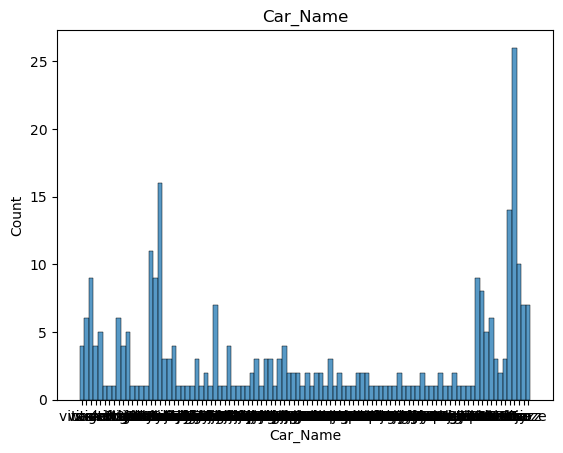

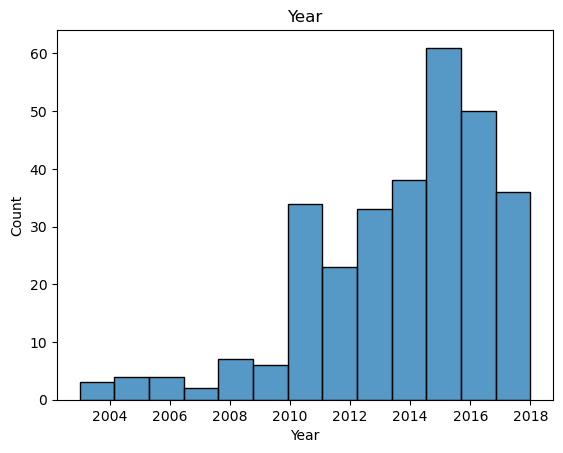

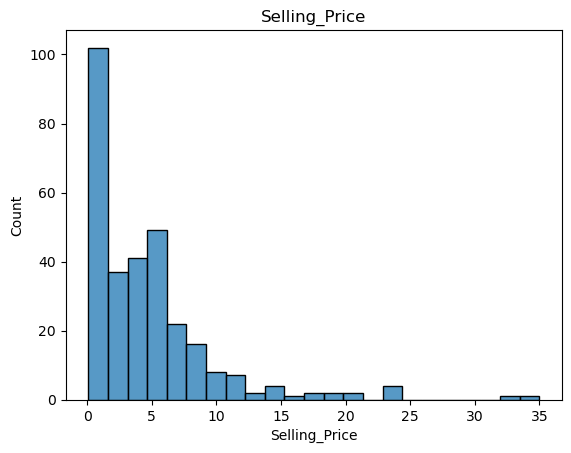

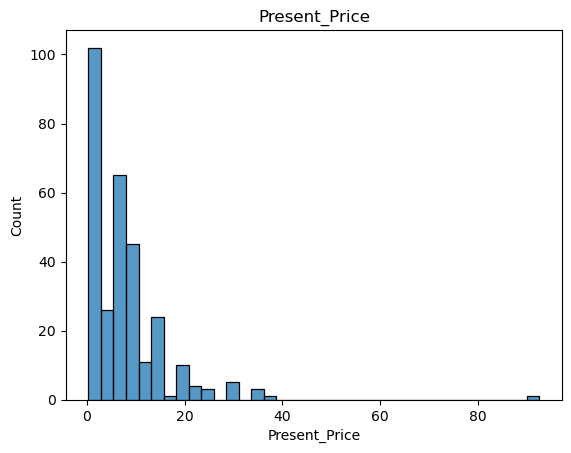

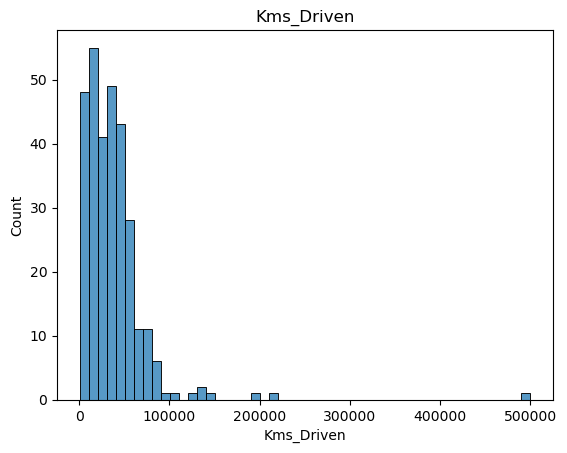

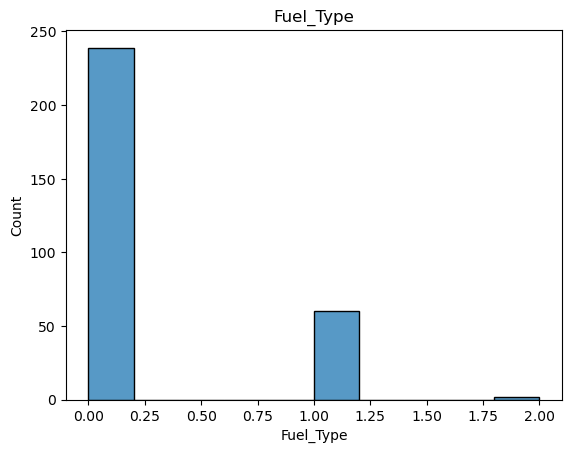

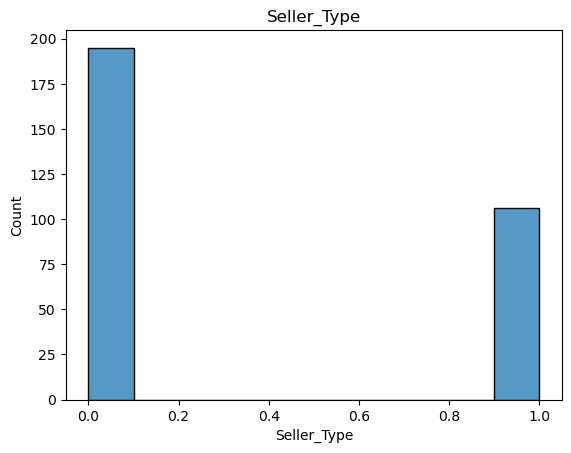

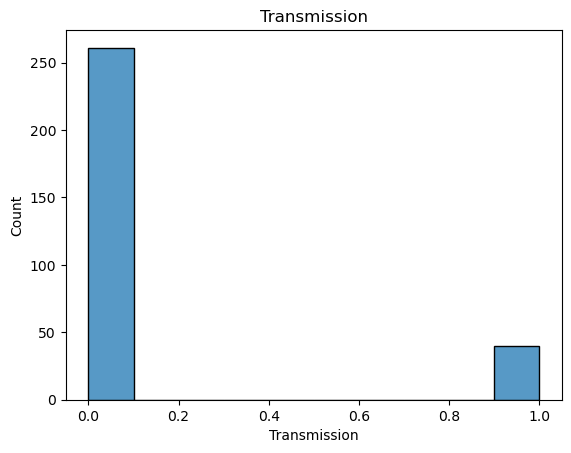

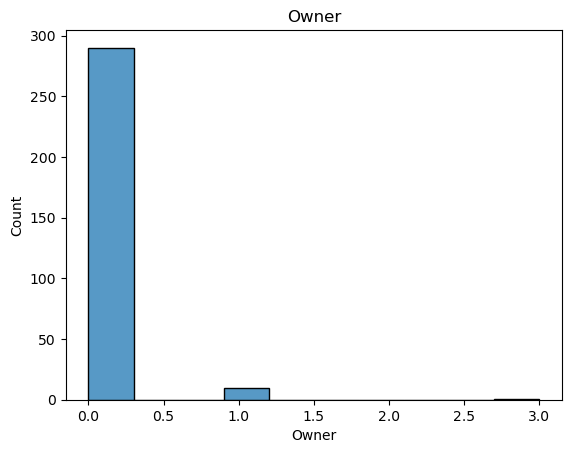

In [6]:
for i in df.columns:
    sns.histplot(df[i])
    plt.title(i)
    plt.show()

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [8]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


In [9]:
y = df['Selling_Price']
X = df.drop(columns = ['Selling_Price','Car_Name'])

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,shuffle=True)

In [12]:
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train)
predictions = linearRegression.predict(X_test)
print(r2_score(y_test,predictions))

0.8401532365377695


----
Linear regression r^2 error: = 0.840

In [13]:
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import train_test_split

In [14]:
lassoRegression = Lasso()
lassoRegression.fit(X_train,y_train)
lassoPredictions=lassoRegression.predict(X_test)
print(r2_score(y_test,lassoPredictions))
print(f"Alpha = {lassoRegression.alpha}")

0.8497457570738539
Alpha = 1.0


Lasso regression r^2 error = 0.849 with alpha=1.0

In [15]:
lassoRegressionCV = LassoCV(cv=10)
lassoRegressionCV.fit(X_train,y_train)
lassoRegressionCVpredictions = lassoRegressionCV.predict(X_test)
print(r2_score(y_test,lassoRegressionCVpredictions))
print(f"Alpha = {lassoRegressionCV.alpha_}")

0.8424125128820245
Alpha = 1.5820253836805536


Lasso regression r^2 error = 0.842 with alpha=1.5

In [16]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
standardScaler = StandardScaler()
scaled_X = standardScaler.fit_transform(X)
scaled_X_train,scaled_X_test,scaled_y_train,y_test = train_test_split(scaled_X,y,test_size=0.3,random_state=2)

In [17]:
lassoRegression.fit(scaled_X_train,scaled_y_train)
scaledLassoRegressionpredictions = lassoRegression.predict(scaled_X_test)
print(r2_score(y_test,scaledLassoRegressionpredictions))

0.7564627729791302


Lasso regression r^2 error = 0.756 with alpha 1

After comparing linear regression, lasso regression, lasso regression with CV and a scaled data model for lasso regression, we can see that lasso regression is probably the best fit for the data. 